[Episode Reward] - Skipped: Directory tensorboard/PPO_1 has been permanently deleted
[Total Loss] - Skipped: Directory tensorboard/PPO_1 has been permanently deleted
[Value Loss] - Skipped: Directory tensorboard/PPO_1 has been permanently deleted
[Policy Gradient Loss] - Skipped: Directory tensorboard/PPO_1 has been permanently deleted
[Entropy Loss] - Skipped: Directory tensorboard/PPO_1 has been permanently deleted
[Approx KL] - Skipped: Directory tensorboard/PPO_1 has been permanently deleted


C:\Users\luvra\AppData\Local\Temp\ipykernel_19120\2674584695.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


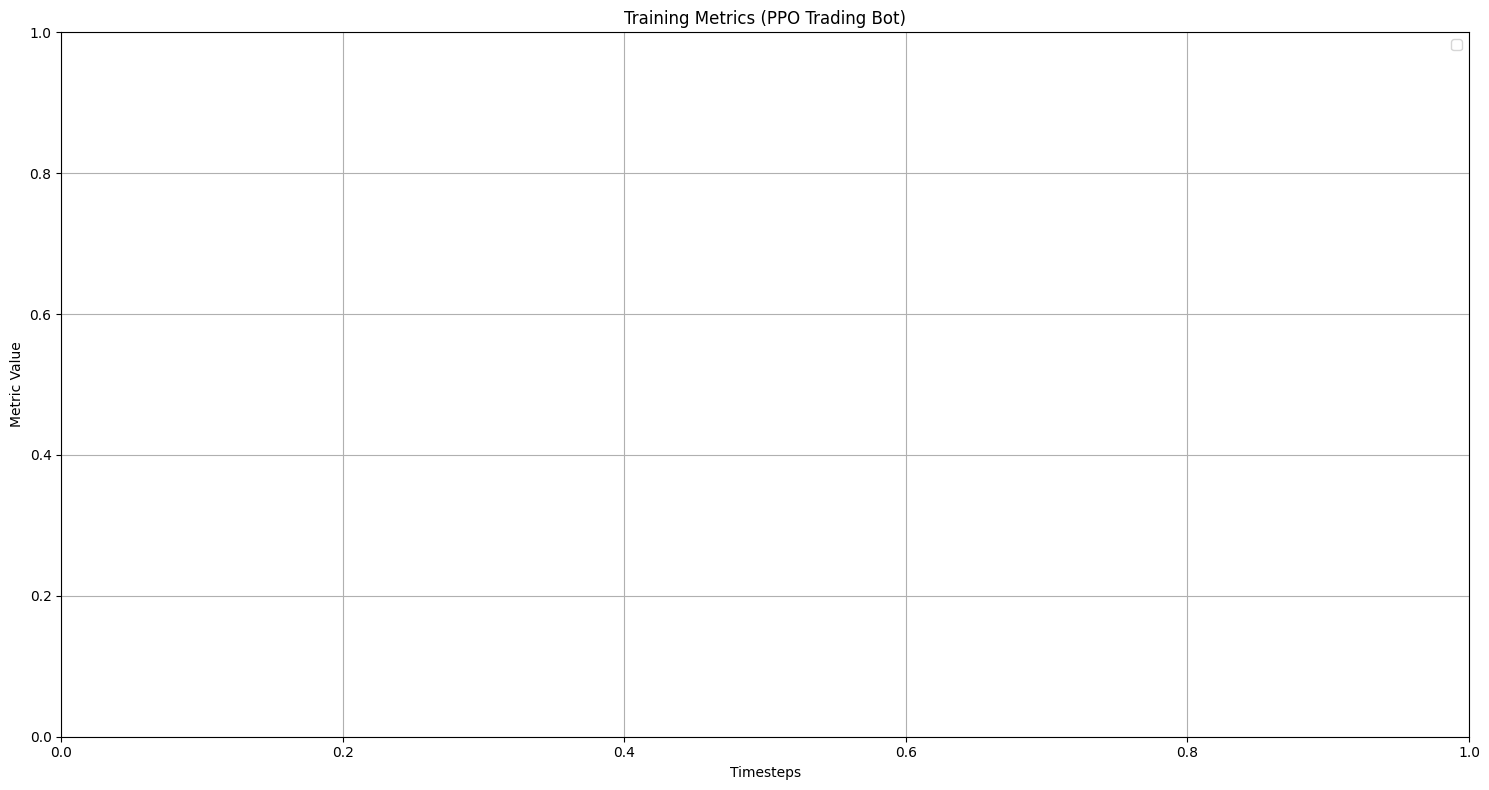

In [1]:
import os
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

def load_scalar_from_event_file(log_dir, tag):
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()
    events = event_acc.Scalars(tag)
    steps = [e.step for e in events]
    values = [e.value for e in events]
    return steps, values

def plot_metrics(log_dir):
    metrics = {
        "rollout/ep_rew_mean": "Episode Reward",
        "train/loss": "Total Loss",
        "train/value_loss": "Value Loss",
        "train/policy_gradient_loss": "Policy Gradient Loss",
        "train/entropy_loss": "Entropy Loss",
        "train/approx_kl": "Approx KL",
    }

    plt.figure(figsize=(15, 8))

    for i, (tag, label) in enumerate(metrics.items()):
        try:
            steps, values = load_scalar_from_event_file(log_dir, tag)
            plt.plot(steps, values, label=label)
        except Exception as e:
            print(f"[{label}] - Skipped: {e}")

    plt.legend()
    plt.xlabel("Timesteps")
    plt.ylabel("Metric Value")
    plt.title("Training Metrics (PPO Trading Bot)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Usage
if __name__ == "__main__":
    plot_metrics("tensorboard/PPO_1")  # adjust path to your actual run folder
